In [1]:
# import useful packages
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
# read file from csv
def read_file(filepath):
    if filepath.endswith("csv"):
        return pd.read_csv(filepath)
    elif filepath.endswith("txt"):
        return pd.read_csv(filepath)


In [23]:
data=read_file("./data/data2.txt")
data=np.array(data)
# data=normalization(data)
# data
X=data[:,0:-1]
Y=data[:,-1]
Y.shape=(Y.shape[0],1)




<img src="img1.jpg" width="30%"/>

This figure shows an example of classification problem. 






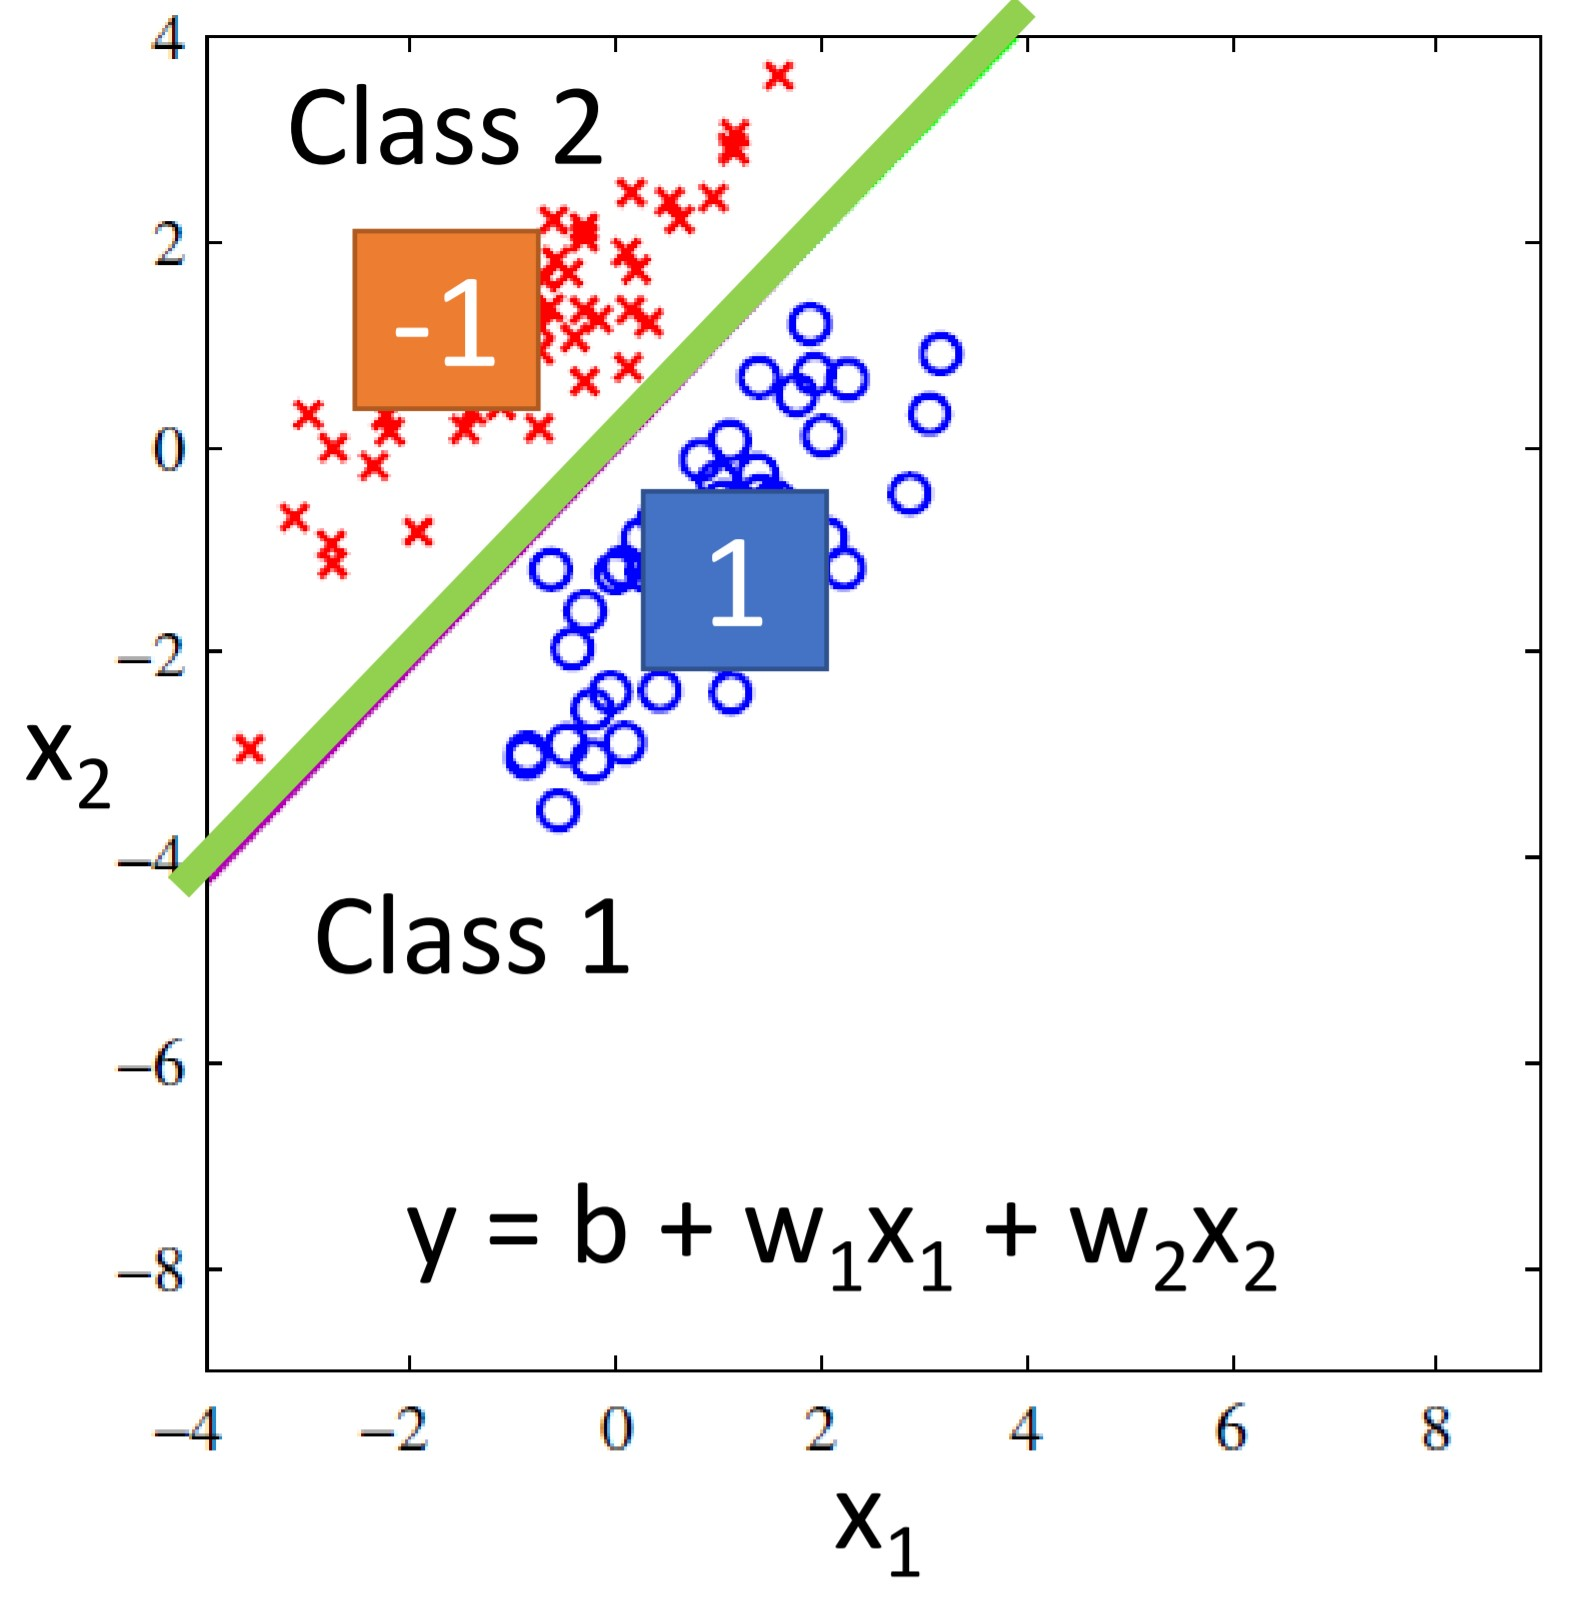


logistic regression is a classification model mainly used for binary classification problems. The basic idea behind the logistic model is assuming the data obey logistic distribution and to estimate the parameters for this model.

<img src="https://pic2.zhimg.com/v2-83469109cd362f5fcf1decf109007fbd_b.png" width="50%" />

This figure shows the sigmoid function and the derivative of the sigmoid function. 

$$z=X\theta$$

$$H_\theta(X)=\frac{1}{1+e^{-z}}$$ this is the logistic function.


For a binary classification problem. we'd like to find a decision boundary of the data. The decision curve is determined similar to the linear regression($X\theta$ in the formula ). when we determine a decision boundary, we will use the logistic distribution to quantify the classification result under this boundary.


The method used to quantify the error of logistic model is called cross entropy.
$$J(\theta)=-\frac{1}{n} \sum_{i=1}^n (y_iln(H(x_i))+(1-y_i)ln(1-H(x_i))))$$


$$\frac{\partial J}{\partial \theta} =\frac{\partial J}{\partial H} \frac{\partial H}{\partial z} \frac{\partial z}{\partial \theta}  $$




$$\frac{\partial J}{\partial H} = -\frac{1}{n} \sum_{i=1}^n (\frac{y_i}{(H(x_i))}+\frac{(1-y_i)}{(1-H(x_i))})) = -\frac{1}{n} \sum_{i=1}^n \frac{y_i-H(x_i)}{H(x_i)(1-H(x_i))}$$

$$\frac{\partial H}{\partial z} = \frac{e^z(1+e^z)-e^ze^z}{(1+e^z)^2}    = H(1-H)$$

$$\frac{\partial z}{\partial \theta} = x$$

Thus, 
$$\frac{\partial J}{\partial \theta}=-\frac{1}{n} \sum_{i=1}^n \frac{y_i-H(x_i)}{H(x_i)(1-H(x_i))}* H(1-H)* x_i=-\frac{1}{n} \sum_{i=1}^n (y_i-H(x_i))x_i $$


The matrix form $\frac{1}{n} (Y-\hat{Y}) * X$



gradient descent 

$\theta= \theta - \frac{\alpha}{n} ((Y-\hat{Y}) * X)$



0.6899777909984568


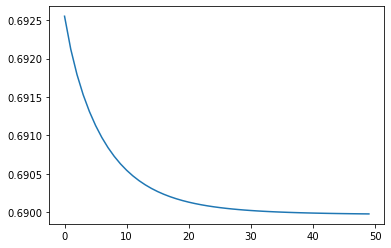

In [51]:
def Z(X,theta):
    return X@theta

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def predict(X,theta):
    return sigmoid(Z(X,theta))

def costFunction(X,Y,theta):
    a=Y.T@np.log(predict(X,theta))
    b=(1-Y).T@np.log(1-predict(X,theta))
    c=-(a+b)/X.shape[0]
    
    return c[0][0]



def gradientDescent(X,Y,theta,alpha,num_iters):
    a=[]
    for i in range(num_iters):
        # update theta with matrix 
        theta=theta-((alpha/X.shape[0])* (X.T@(predict(X,theta)-Y)+theta*0.5)  )
        a.append(costFunction(X,Y,theta))

    plt.plot(range(num_iters),a)
    print(a[-1])
    return theta


def LogisticRegression(X,Y,alpha=0.01,num_iters=100):
    row=X.shape[0]
    col=X.shape[1]

    X = np.hstack((np.ones((X.shape[0],1)),X)) 

    theta = np.zeros((col+1,1))

    theta=gradientDescent(X,Y,theta,alpha,num_iters)
    
    return theta

a=LogisticRegression(X,Y,1.2,50)